In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

# Machine Learning Concepts

<img src="dcr.png" alt="title1" width="1150"/>

# Setup

In [8]:
import warnings; warnings.simplefilter('ignore')
from dcr import *
%matplotlib inline

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams.update({'font.size': 16})

# Synopsis 

- Machine learning as "reduced form" of risk-based learning
- Cost/loss function $J(y,\hat{y})$
- Model fitting and prediction
- Data splitting
- Hyperparameters and crossvalidation
- Deep learning
- Supervised vs. unsupervised learning


| Risk-based Learning | Machine Learning |
| --- | --- |
| Estimation | Fitting |
| Independent/Explanatory Variable, $X$ | Input, Feature |
| Dependent/Response Variable, $Y$ | Output |
| Random Error  | Noise |
| In-Sample | Training Set |
| Out-of-Sample | Test Set |
| Estimate a Model |  Learn a Model |
| Model Parameters | Model Weights |
| Regression, Classification | Supervised Learning |
| Clustering and Dimensionality Reduction | Unsupervised Learning |
| Data Point, Observation | Instance, Sample |
| Intercept | Bias |
| Link Function |  Activation Function |
| Logistic | Sigmoid |


# Workflow in Machine Learning

- Prepare data
- Instantiate model
- Fit model
- Evaluate model

# Cost Functions

## Continuous Targets: Information and Entropy

- Fit the data by minimizing some cost/loss function
- Cost function for metric outputs (e.g., LGDs): Mean Squared Error (MSE)
\begin{align*}
J =  \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{align*}

## Binary Targets: Information and Entropy

- Data (default/non-default) as signal providing information
- Information of a default event
\begin{align*}
I(d) = \log_2\left(\frac{1}{\pi}\right) = -\log_2(\pi)
\end{align*}
- Base 2 of logarithm is used for normalization because we have two events
-  For low value of  𝜋, chance of non-default is high and the observation of a default would be a surprise with high information content
- Logarithms are used as a convention, because they give the numbers of bits needed for describing the information, e.g., one loan with default/non-default requires $\log_2(2)=1$ bit, two loans require $log_2(4)=2$ bits as there are 4 potential states.

In [9]:
def I(pi):
    return -math.log(pi, 2)    

Then let $\pi$ run in a for-loop 


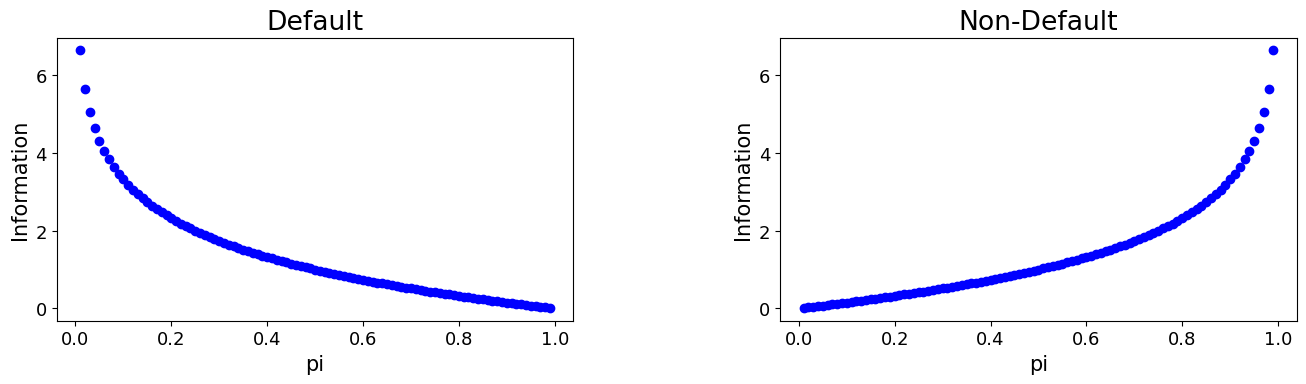

In [10]:
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(221)
plt.title('Default')
for i in range(1, 100, 1):
    pi = i/100
    plt.xlabel('pi', fontsize=15)
    plt.ylabel('Information', fontsize=15)
    plt.tick_params(axis='both', labelsize=13)
    plt.plot(pi, I(pi), color='blue', marker='o')

plt.subplot(222)
plt.title('Non-Default')
for i in range(1, 100, 1):
    pi = i/100
    plt.xlabel('pi', fontsize=15)
    plt.ylabel('Information', fontsize=15)
    plt.tick_params(axis='both', labelsize=13)
    plt.plot(pi, I(1-pi), color='blue', marker='o')
plt.show()

- Entropy is defined as expected information:

\begin{align*}
H = - \pi \ln(\pi)- (1-\pi) \ln (1-\pi)
\end{align*}

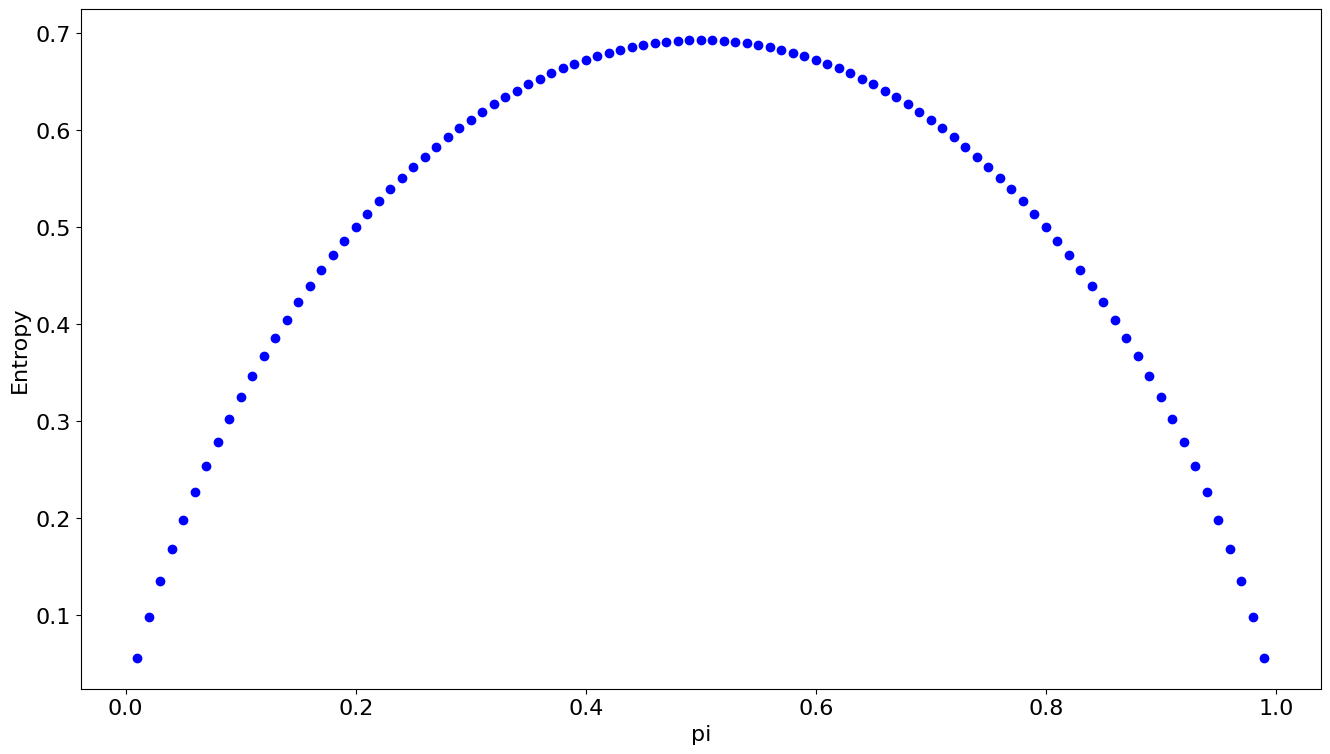

In [11]:
def Entropy(pi):
    return -pi * math.log(pi) - (1-pi)* math.log(1-pi)    

for i in range(1, 100, 1):
    pi = i/100
    plt.xlabel('pi')
    plt.ylabel('Entropy')
    plt.plot(pi, Entropy(pi), color='blue', marker='o')

- Crossentropy with observed data (default (`d=0`) and a non-default (`d=1`)) and true probabilities
\begin{align*}
H^* =  - d \ln(\pi) - (1-d) \ln (1-\pi)
\end{align*}

In [12]:
def CrossEntropy(pi, d):
    if d == 1:
        return -math.log(pi)
    else:
        return -math.log(1 - pi)  

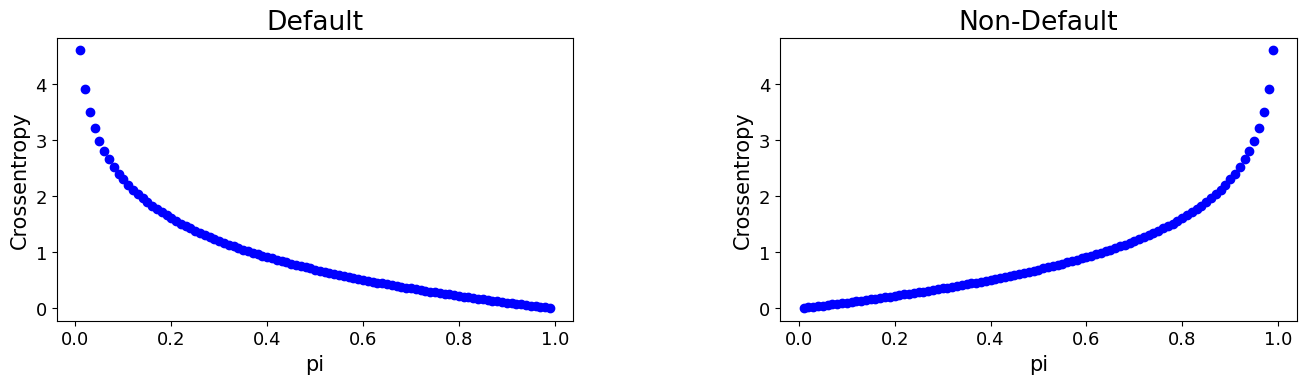

In [13]:
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(221)
plt.title('Default')
for i in range(1, 100, 1):
    d=1
    pi = i/100
    plt.xlabel('pi', fontsize=15)
    plt.ylabel('Crossentropy', fontsize=15)
    plt.tick_params(axis='both', labelsize=13)
    plt.plot(pi, CrossEntropy(pi,d), color='blue', marker='o')

plt.subplot(222)
plt.title('Non-Default')
for i in range(1, 100, 1):
    d=0
    pi = i/100
    plt.xlabel('pi', fontsize=15)
    plt.ylabel('Crossentropy', fontsize=15)
    plt.tick_params(axis='both', labelsize=13)
    plt.plot(pi, CrossEntropy(pi,d), color='blue', marker='o')
plt.show()

- Observed default frequencies $\sum_i^n d_i/n$
- Crossentropy for all observed data
\begin{align*}
H^* = -1/n (\sum_i^n d_i \ln(\pi_i) + \sum_i^n (1-d_i) \ln(1-\pi_i))
\end{align*}
- Called Binary crossentropy
- Note the equivalence with the Likelihood

# Optimization: Gradient Descent 

## General Approach

- Real-valued, differentiable function of an $n$-dimensional vector $z$, $f(z)$, where $f:\mathbb{R}^n \rightarrow \mathbb{R}$, 
- Minimize, i.e.,
\begin{align*}\min_{z} f(z)
\end{align*}
- Given starting point $z_0$, generate values $z_k$ iteratively according to
\begin{align*}
z_{k+1} = z_k + \eta_k \cdot d_k, \ \ \ k =0,1,2,...
\end{align*}
- $\eta_k>0$: learning rate; $d_k \in  \mathbb{R}^n$: descent direction

 ### Simple Example

- Let $y = f(z) = z^2$
- First derivative is $\frac{\delta f(z)}{\delta z} = 2 \cdot z$
- Set learning rate $\eta$ and the starting value, e.g., $z_0=-0.1$
- Compute derivative $2\cdot z_0 = -0.2$ and $f(z_0)=f(-0.1) =0.01$
- Set $z_1 = z_0 - \eta \cdot \frac{\delta f(z)}{\delta z}|_{z=-0.1} = -0.1 - 0.01 \cdot (-0.2) = -0.098$
- $2\cdot z_1 = -0.196$
- Continue `n_iter` times

z: -1.6829673572159562e-10
function: 2.949166103138755e-20
derivative: -3.4346272596244006e-10


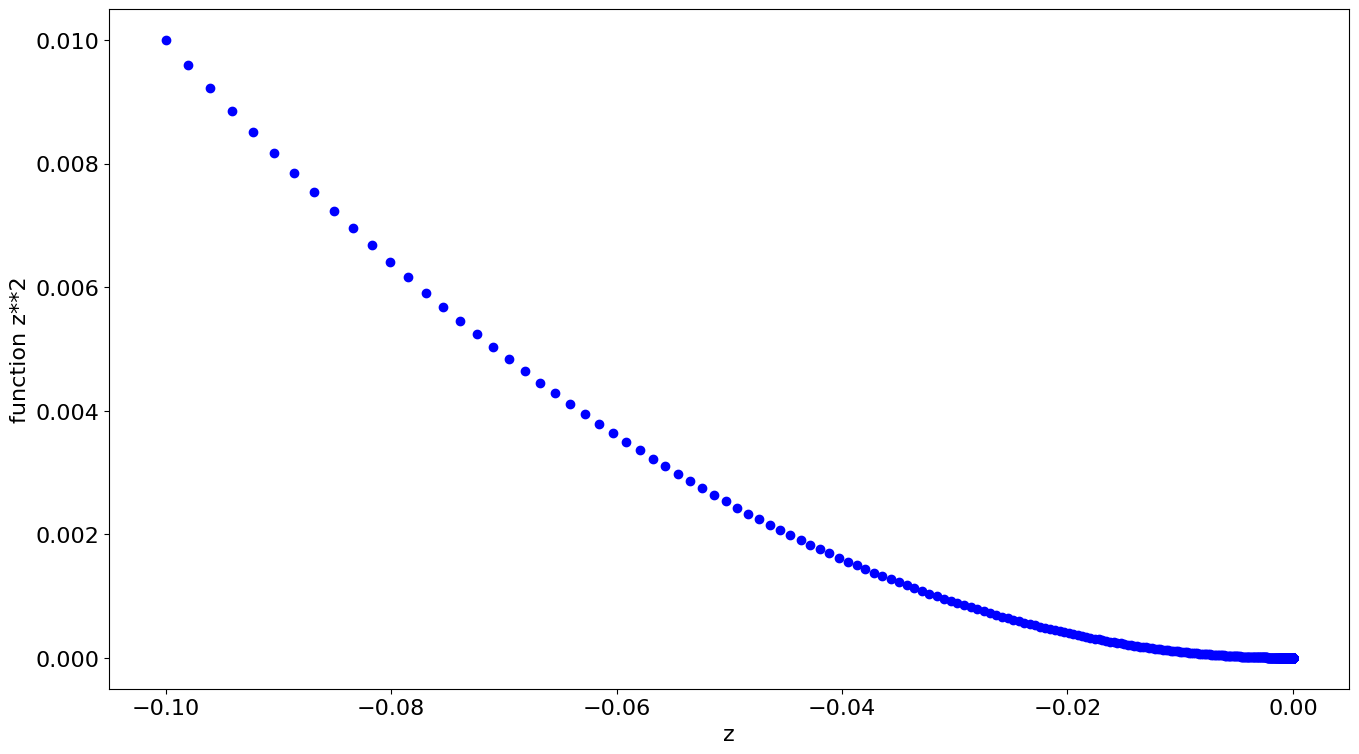

In [14]:
def fun(z):    
    return z**2   

def deriv_fun(z):
    return 2*z

lr = 0.01
z_s = -0.1

for i in range(0,1000):
    d_f = deriv_fun(z_s)
    f = fun(z_s)
    plt.xlabel('z')
    plt.ylabel('function z**2')
    plt.plot(z_s, f,color='blue', marker='o')
    z_s = z_s - lr * d_f
    
print('z:',z_s)
print('function:',f)
print('derivative:',d_f)

## Continuous Outcomes (e.g. LGDs)

- Linear model $f(x_i, \beta) = x_i \cdot \beta$
- Cost function
\begin{align*}J(\beta)  &= \frac{1}{n}\sum_{i = 1}^n (y_i - f(x_i, \beta))^2 =  \frac{1}{n} (y- X\beta)^T (y- X\beta)
\end{align*}
- Gradient
\begin{align*}
\frac{\partial J(\beta)}{\partial \beta} = - \frac{2}{n} X^T( y -X\beta)
\end{align*}
- Parameters adjusted according to 
\begin{align*}
\beta_{k+1} = \beta_k - \eta \frac{\partial J(\beta_k)}{\partial \beta_k}
\end{align*}

In [15]:
x = np.array([0.35, 0.80, 0.55, 1.10])
y = np.array([0.3, 0.55, 0.50, 0.85])

Text(0, 0.5, 'LGD')

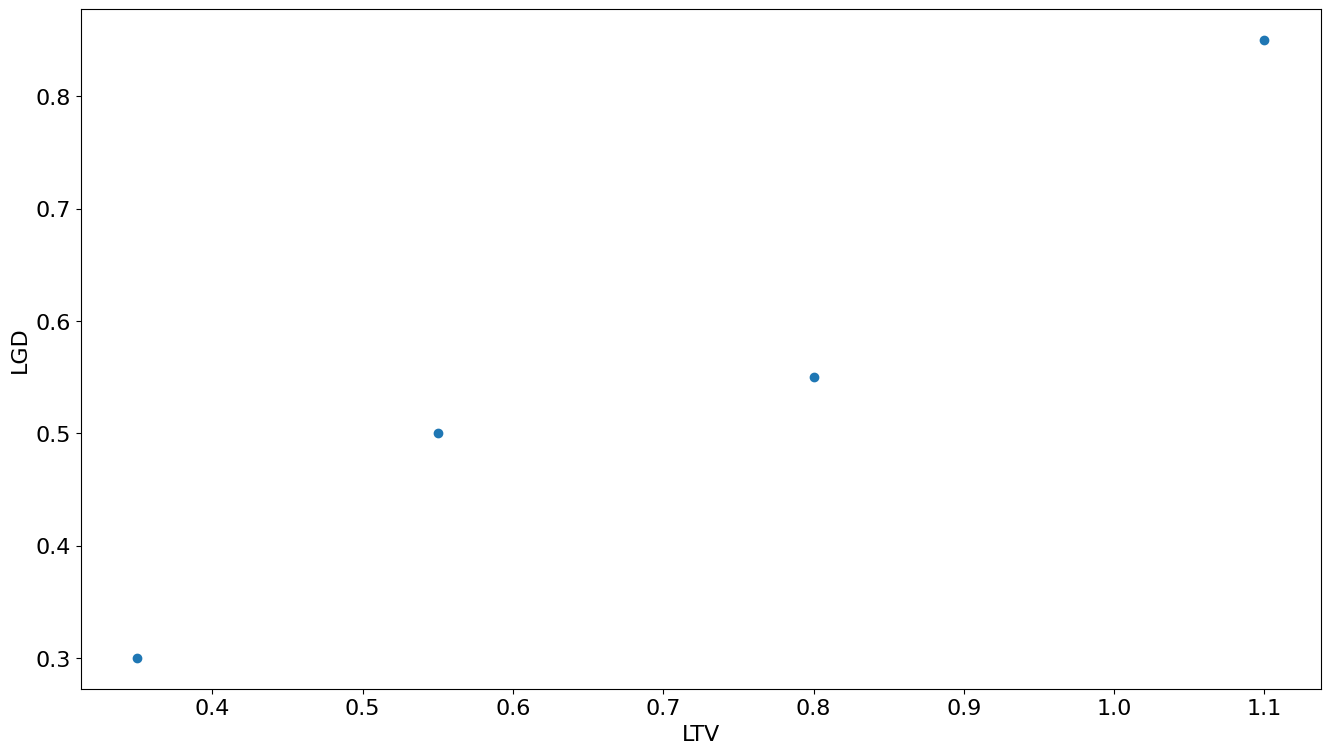

In [16]:
plt.scatter(x, y, marker='o')
plt.xlabel('LTV')
plt.ylabel('LGD')

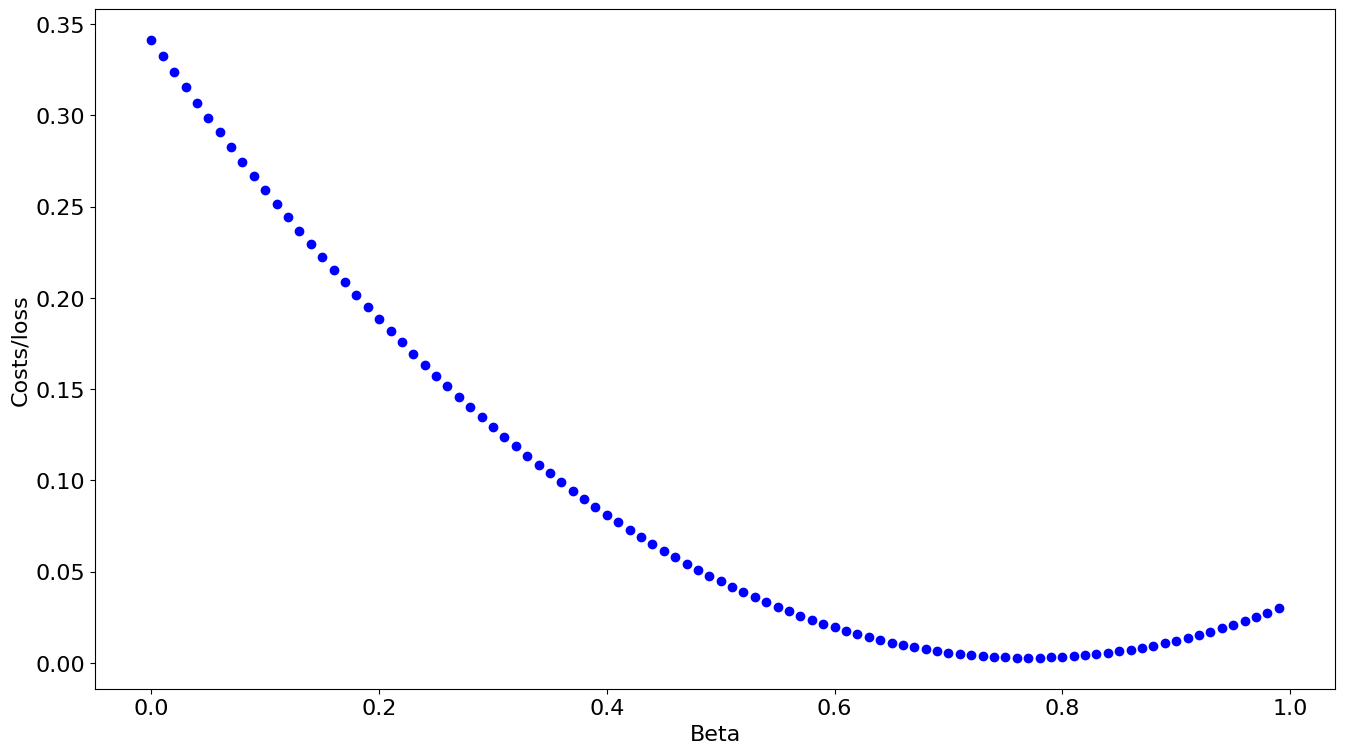

In [17]:
def J_cost_fun(beta):
    y_pred = beta * x
    costs = (y-y_pred)**2 
    cost = np.mean(costs)
    return cost

for beta_s in range(0, 100, 1):
    cost_beta = J_cost_fun(beta_s/100)
    plt.xlabel('Beta')
    plt.ylabel('Costs/loss')
    plt.plot(beta_s/100, cost_beta, color='blue', marker='o')

Solution for beta: 0.77


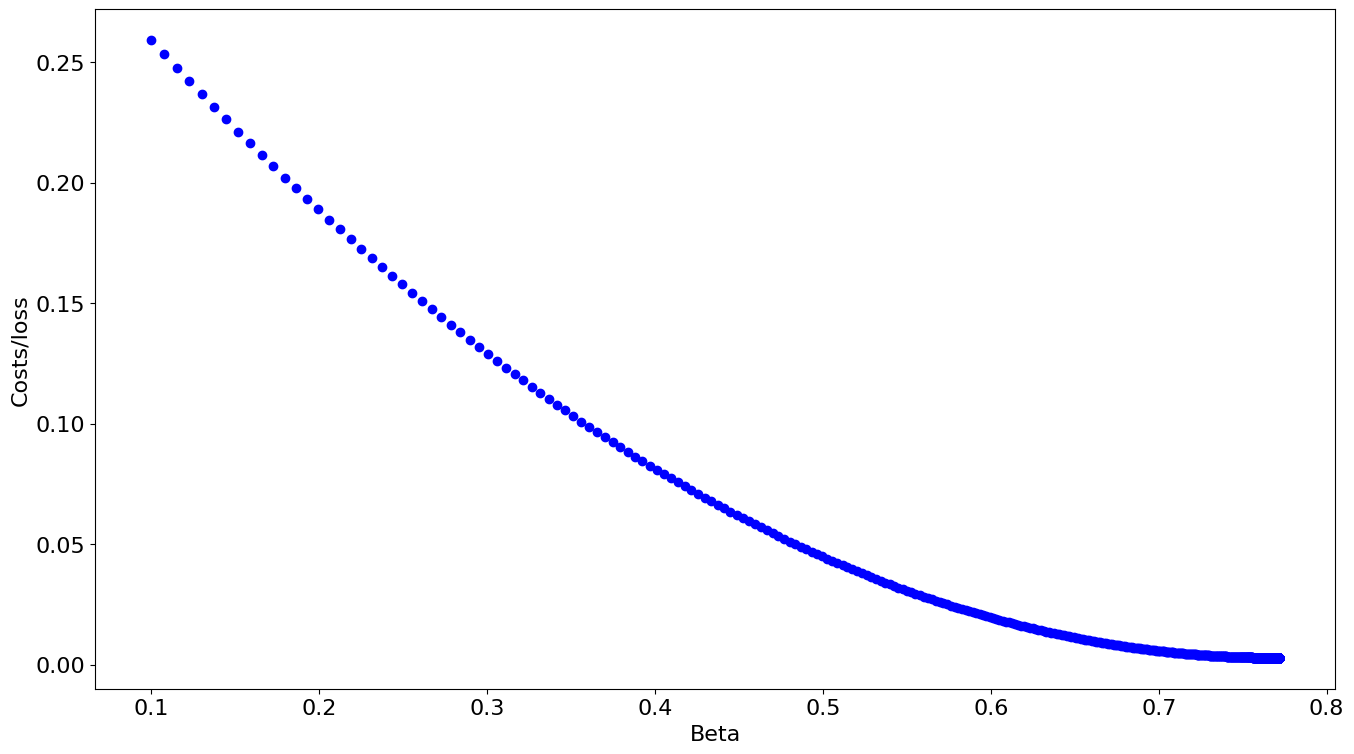

In [18]:
def J_deriv(beta):
    y_pred = beta * x
    tmp =  np.mean(-2 * x * (y - y_pred))
    return tmp

lr = 0.01
beta_s = 0.1

for i in range(0,1000):
    d_beta = J_deriv(beta_s)
    cost = J_cost_fun(beta_s)
    plt.xlabel('Beta')
    plt.ylabel('Costs/loss')
    plt.plot(beta_s, cost,color='blue', marker='o')
    beta_s = beta_s - lr * d_beta
    
print('Solution for beta:', np.round(beta_s,2))

In [19]:
model = sm.OLS(y,x)
results = model.fit()

print('Solution for beta:', np.round(results.params,2))

Solution for beta: [0.77]


## Binary Outcomes (e.g., PDs)

- Cost function
\begin{align*}
J(\beta)  =  -\frac{1}{n} \sum_{i=1}^n (d_i \ln(\pi_i) + (1-d_i) \ln(1-\pi_i)) \\
=\frac{1}{n} \left( -d^T\ln(\pi) - (1-d)^T \ln (1 - \pi) \right)
\end{align*}
- Logit link function
\begin{align*}
\pi_i = \mathbb{P}(d_i = 1 \, | \, x_i) =  \frac{\exp(x_i\beta)}{1 + \exp(x_i\beta)} = \frac{1}{1 + \exp(-x_i \beta)}
\end{align*}
- Gradient
\begin{align*}
\frac{\partial J(\beta)}{\partial \beta_j} = \frac{1}{n} \sum_{i=1}^n  x_{ij} \left( \pi_i - d_i \right) \\
\end{align*}
- Parameters adjusted according to
\begin{align*}
\beta_{k+1} = \beta_k - \eta \frac{\partial J(\beta_k)}{\partial \beta_k}
\end{align*}

In [20]:
x = np.array([400, 300, 200, 100])
d = np.array([0, 0, 1, 1])

In [21]:
def J_cost_fun_bin(beta):
    pd_pred = np.exp(beta * x) / (1+ np.exp(beta * x) )
    costs = d*np.log(pd_pred) + (1-d) * (np.log(1-pd_pred))
    cost = -np.mean(costs)
    return cost       

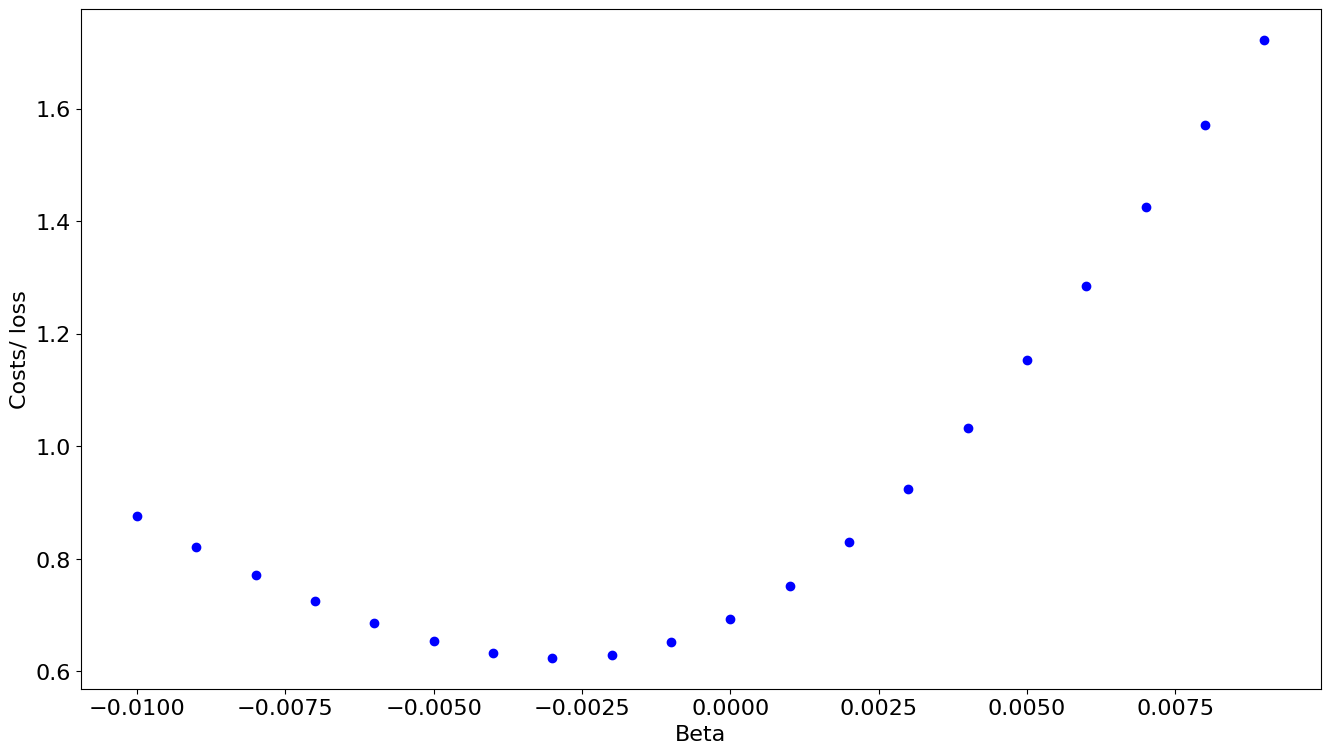

In [22]:
for beta_s in range(-10, 10, 1):
    cost_beta = J_cost_fun_bin(beta_s/1000)
    plt.xlabel('Beta')
    plt.ylabel('Costs/ loss')
    plt.plot(beta_s/1000, cost_beta, color='blue', marker='o')

In [23]:
def J_deriv_bin(beta):
    pd_pred = np.exp(beta * x) / (1+ np.exp(beta * x) )
    tmp =  np.mean(x * (pd_pred - d))
    return tmp

Solution for beta: -0.0029


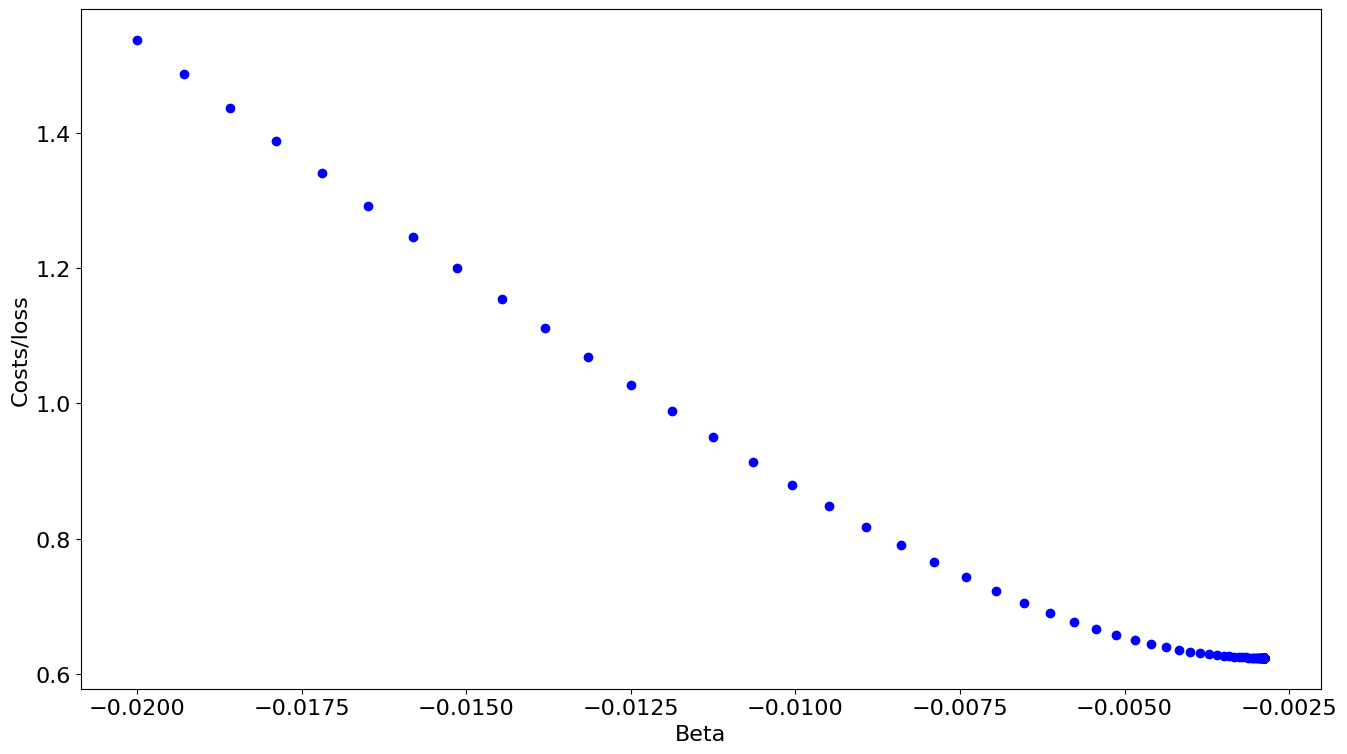

In [24]:
lr = 0.00001
beta_s = -0.02

for i in range(0,1000):
    d_beta = J_deriv_bin(beta_s)
    cost = J_cost_fun_bin(beta_s)
    plt.xlabel('Beta')
    plt.ylabel('Costs/loss')
    plt.plot(beta_s, cost, color='blue', marker='o')
    beta_s = beta_s - lr * d_beta
    
print('Solution for beta:', np.round(beta_s,4))

In [25]:
model_logit = sm.Logit(d, x)
results_logit = model_logit.fit()

print('Solution for beta:', np.round(results_logit.params,4))

Optimization terminated successfully.
         Current function value: 0.623958
         Iterations 4
Solution for beta: [-0.0029]


In [26]:
x=x.reshape(-1, 1) 
model_lr = LogisticRegression(penalty='none', fit_intercept=False, solver='lbfgs', tol =1e-15, max_iter=1000)
model_lr.fit(x, d)

print('Solution for beta:', np.round(model_lr.coef_,4))

Solution for beta: [[-0.0029]]


# Learning and Validation

## Train vs. Test Split

- Split data into a training/estimation sample and a test sample
- Check prediction power on test sample
 

## Bias-Variance-Tradeoff 

Expected error of fitting:

-  Bias (underfitting):  model does not fit the data very well; model generalizes too much.
-  Variance (overfitting): the model fits the training data too well; model generalizes too little.
-  Irreducible random error.  

Trade-off between Bias and Variance

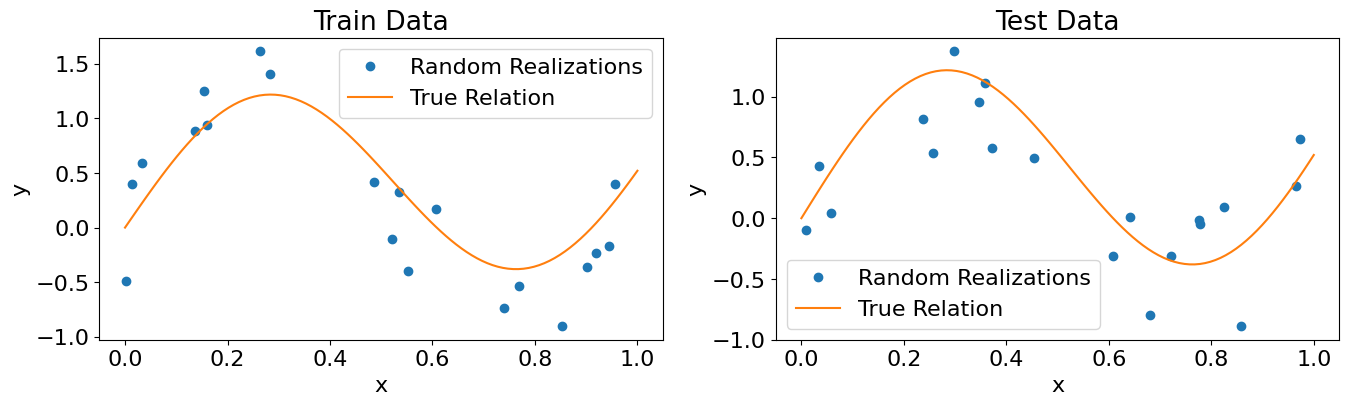

In [27]:
np.random.seed(seed=12)
N_sim = 20
mu, sigma = 0, 0.3

x_train = np.random.uniform(low=0.0, high=1.0, size=N_sim)
eps_train = np.random.normal(mu, sigma, N_sim)
y_train = 0.8 * x_train + np.sin(6 * x_train) + eps_train

np.random.seed(seed=13)
x_test = np.random.uniform(low=0.0, high=1.0, size=N_sim)
eps_test = np.random.normal(mu, sigma, N_sim)
y_test = 0.8 * x_test + np.sin(6 * x_test) + eps_train

plt.rcParams['figure.figsize'] = (16, 4)
plt.rcParams.update({'font.size': 16})
plt.subplot(1,2,1)
x_axis = np.linspace(0, 1, 100)
y_true = 0.8 * x_axis + np.sin(6 * x_axis)
plt.plot(x_train, y_train, linestyle='none', marker='o', label='Random Realizations')
plt.plot(x_axis, y_true, label="True Relation")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train Data')
plt.legend()
plt.subplot(1,2,2)
plt.plot(x_test, y_test, linestyle='none', marker='o', label='Random Realizations')
plt.plot(x_axis, y_true, label="True Relation")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Test Data')
plt.show()

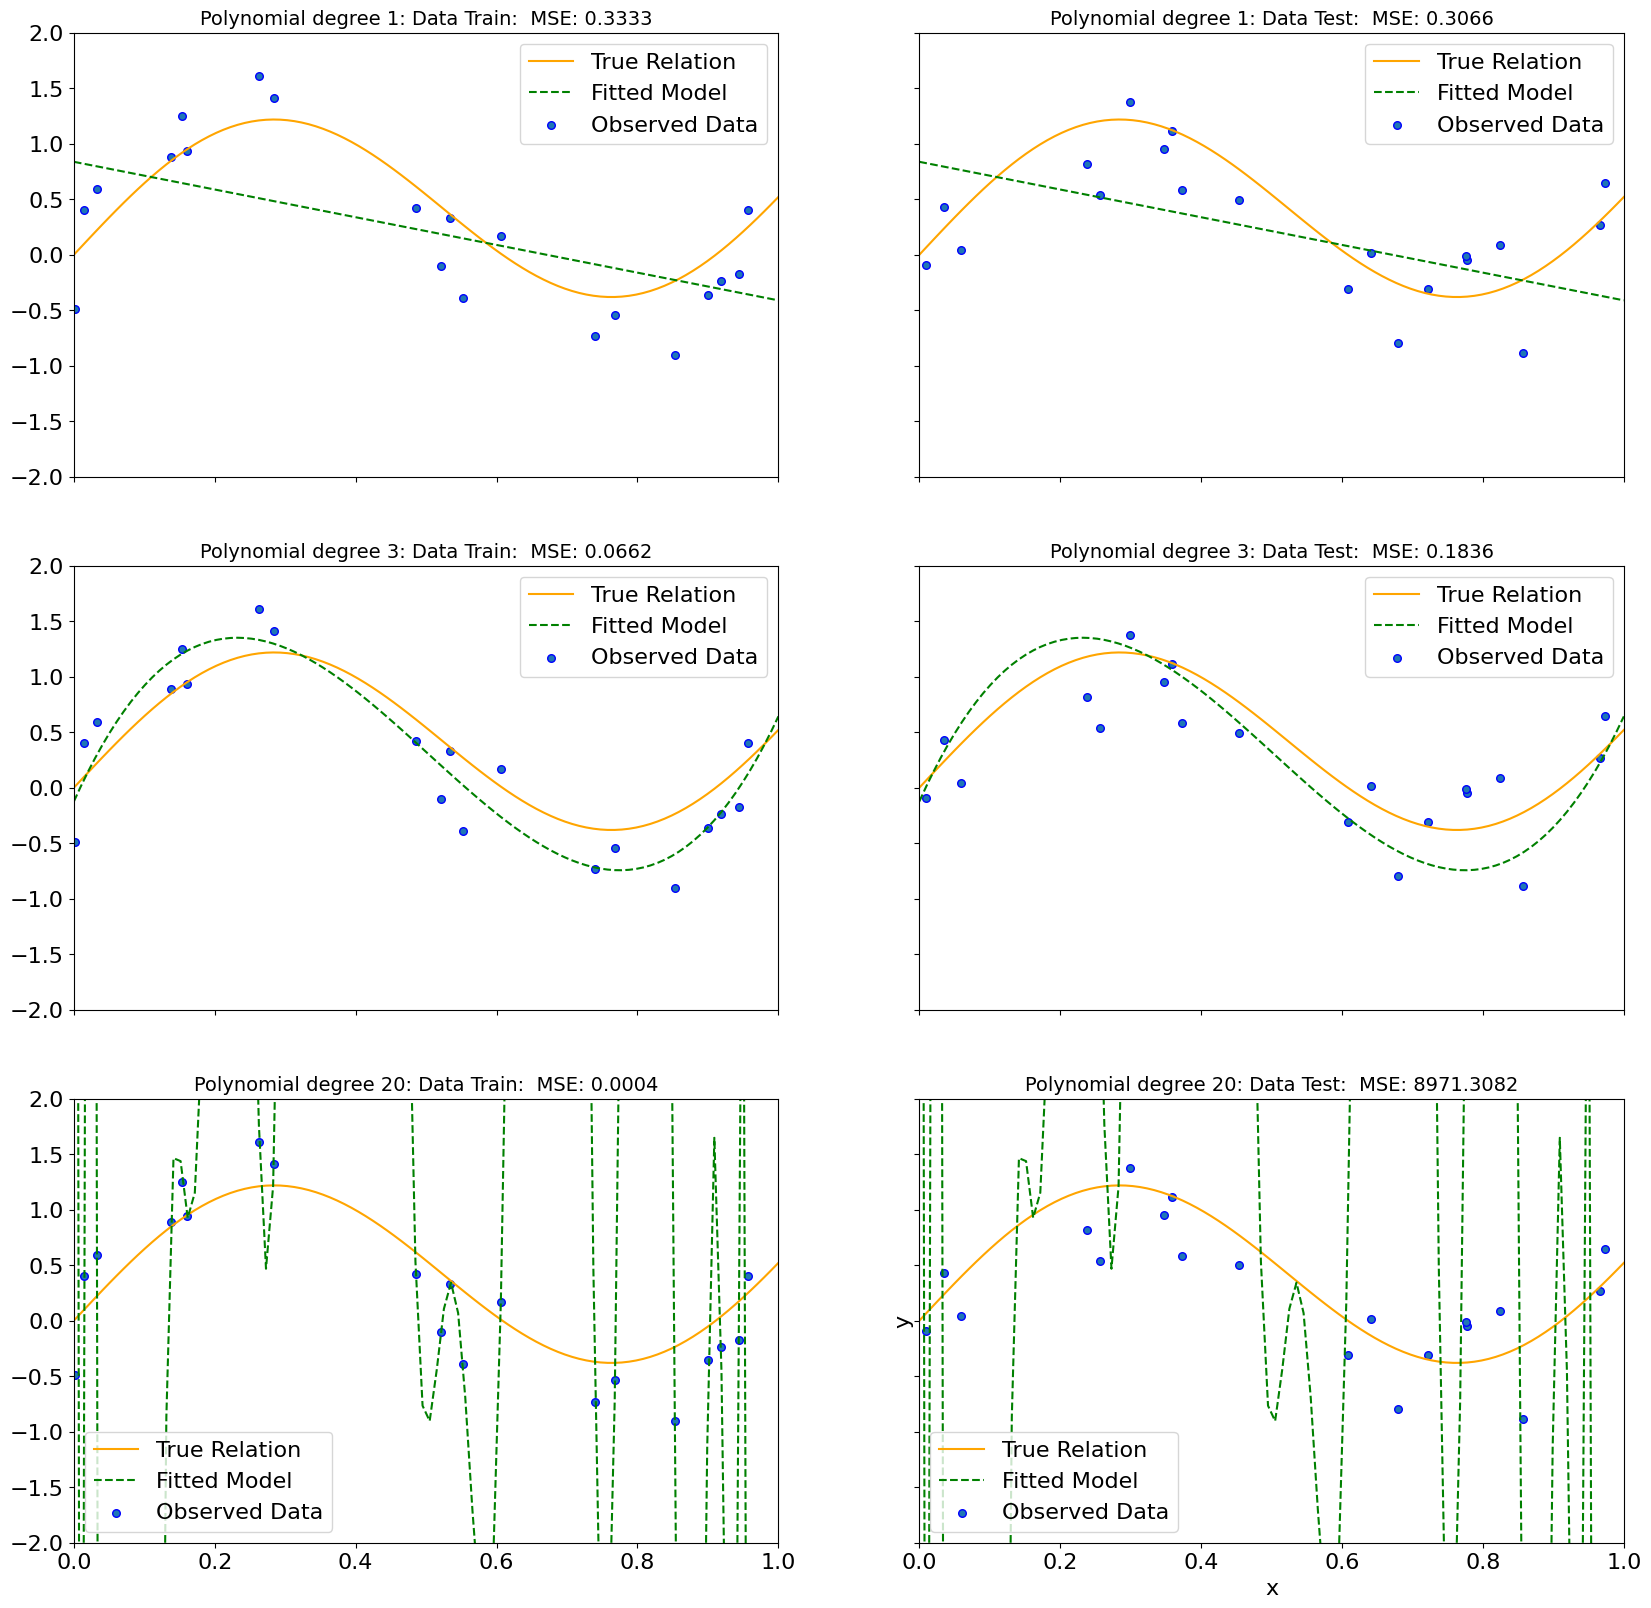

In [28]:
fig, axes = plt.subplots(3,2, sharex=True, sharey=True, figsize=(20,20))

degree =[1,1,3,3,20,20]

def plot(x,y,mse,degree,data):
    ax.plot(x_axis, y_true, label="True Relation", color='orange')
    ax.plot(x_axis, pipeline.predict(x_axis[:, np.newaxis]),label="Fitted Model", ls ='--' , color='g')
    ax.scatter(x.reshape(-1, 1), y, edgecolor='b', s=30, label="Observed Data")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0, 1))
    plt.ylim((-2, 2))  
    ax.set_title('Polynomial degree {}:'.format(degree)+' Data {}:'.format(data) +'  MSE: {}'.format(mse), fontsize=14)
    ax.legend(loc="best")
    
for i,ax in enumerate(axes.flatten()):
    polynomial_features = PolynomialFeatures(degree=degree[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features), ('linear_regression', linear_regression)])
    pipeline.fit(x_train.reshape(-1, 1), y_train)
    x_axis = np.linspace(0, 1, 100)
    y_true = 0.8 * x_axis + np.sin(6 * x_axis)
    
    # Compute MSE
    if i in [0,2,4]:
        x=x_train
        y=y_train
        data='Train'
        y_pred = pipeline.predict(x.reshape(-1, 1))
        mse = mean_squared_error(y_train, y_pred).round(4)
    if i in [1,3,5]:
        x=x_test
        y=y_test
        data='Test'
        y_pred = pipeline.predict(x.reshape(-1, 1))
        mse = mean_squared_error(y_test, y_pred).round(4)
    plot(x,y,mse,degree[i],data)
plt.show()

## Crossvalidation and Tuning 


- Data are split into train and test sample
- Many machine learning models have hyperparameters which are not fit to the data, e.g. the depth of a neural network
- They are specified ex ante
- Technique is called hyperparameter tuning on the train data
- Done using cross-validation, i.e., split the train data into "train-train" data and "train-validation" data
- Split training data into $K$ roughly equally sized parts
- Then use $k$-th part as validation sample and fit the model to the remaining $K-1$ parts
- Repeat subsequently and compute the prediction error when predicting the $k$-th part 
- Finally computemean of the prediction errors over all folds.


- Credit risk additional challenge: Forecast the future, not the present!
- This distinguishes credit risk from classical machine learning applications 
- Similar distinction as between diagnosis and forecast of a disease

## Regularization

- Impose a penalty on large coefficients (for standardized features)
- LASSO (least absolute shrinkage and selection operator)
\begin{equation*}
\boldsymbol{\hat{\beta}}^{\textrm{lasso}} = \arg \underset{\boldsymbol{\beta}}{\min} \left\{ \sum_{i=1}^N (y_i - \beta_0 - \sum_{j=1}^p x_{ij} \beta_j )^2 + 1/C \sum_{j=1}^p | \beta_j | \right\}
\end{equation*}
- Ridge 
\begin{equation*}
\boldsymbol{\hat{\beta}}^{\textrm{ridge}} = \arg \underset{\boldsymbol{\beta}}{\min} \left\{ \sum_{i=1}^N (y_i - \beta_0 - \sum_{j=1}^p x_{ij} \beta_j )^2 + 1/C \sum_{j=1}^p \beta_j^2 \right\}
\end{equation*}
where $C> 0$ is a hyperparameter 
- Binary targets analogously
- L1 regularization
\begin{equation*}
			\boldsymbol{\hat{\beta}}^{L_1} = \arg \underset{\boldsymbol{\beta}}{\min} \left\{ \sum_{i=1}^n \left( d_i \ln(\pi_i) + (1-d_i) \ln (1-\pi_i) \right) + 1/C \sum_{j=1}^p | \beta_j | \right\}
\end{equation*}
- L2 regularization
\begin{equation*}
			\boldsymbol{\hat{\beta}}^{L_2} = \arg \underset{\boldsymbol{\beta}}{\min} \left\{ \sum_{i=1}^n \left( d_i \ln(\pi_i) + (1-d_i) \ln (1-\pi_i) \right) + 1/C \sum_{j=1}^p \beta_j^2 \right\}
\end{equation*}

- Reduces overfitting
- serves as continuous feature selection technique
- see later in supervised learning

# Practical Implementation 

In [1]:
from dcr import *
default_rate = data.groupby('time')['default_time'].mean().reset_index(drop=False)

plt.rcParams['figure.figsize'] = (16, 5)
plt.rcParams.update({'font.size': 16})
plt.plot('time', 'default_time', data=default_rate)
plt.xlabel('Time')
plt.ylabel('Default rate')
plt.show()

ModuleNotFoundError: No module named 'pydot'

In [30]:
data_train = data[data['time'] < 27]
data_test = data[data['time'] > 26]
data_test = data_test[data_test['time'] <= 40]

In [31]:
X_train = data_train['FICO_orig_time'].values.reshape(-1,1)
y_train = data_train['default_time'].values.reshape(-1)

X_test = data_test['FICO_orig_time'].values.reshape(-1,1)
y_test = data_test['default_time'].values.reshape(-1)

print('Default rate in training sample:', np.mean(y_train).round(3))
print('Default rate in test sample:', np.mean(y_test).round(3))

Default rate in training sample: 0.011
Default rate in test sample: 0.035


In [2]:
# Instantiate model
model_lr = LogisticRegression(penalty='none', fit_intercept=True, solver='newton-cg', tol =1e-15, max_iter=10000)

# Fit model
model_lr.fit(X_train, y_train)

print('Coefficient:' ,np.round(model_lr.coef_,4))
print('Intercept:', np.round(model_lr.intercept_,4))

NameError: name 'LogisticRegression' is not defined

In [33]:
x = sm.add_constant(X_train, prepend=True)
model_logit = sm.Logit(y_train, x).fit()

print(model_logit.summary())

Optimization terminated successfully.
         Current function value: 0.055091
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                13275
Model:                          Logit   Df Residuals:                    13273
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Feb 2021   Pseudo R-squ.:                 0.06909
Time:                        16:41:33   Log-Likelihood:                -731.33
converged:                       True   LL-Null:                       -785.61
Covariance Type:            nonrobust   LLR p-value:                 2.026e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9807      0.723      4.125      0.000       1.564       4.397
x1            -0.0119      0.

In [34]:
# Evaluate model
predictions = model_lr.predict_proba(X_train)[:,1].T

print(np.mean(predictions).round(3))

0.011


In [35]:
predictions = model_lr.predict_proba(X_test)[:,1].T

print(np.mean(predictions).round(3))

0.009


In [36]:
neg_log_loss = cross_val_score(model_lr, X_train, y_train, cv=5,  scoring='neg_log_loss')

print(np.round(neg_log_loss,3))

[-0.06  -0.051 -0.054 -0.058 -0.055]


# P-value and ML-Hacking 

- p-values in statistics are under scrutiny
- Misunderstandings and manipulation
- See Kellner \& Rösch (2019)
- Machine learning (ML) analogous susceptible to hacking/manipulation

 - develop a model using train data;
 - check prediction the power using test data; 
 - tune the model again using train data;
 - check again for test data;
 - continue until prediction power for test data is satisfactory
 
- Overfitting

# Sandbox Problems

 - Compute the information value, entropy and crossentropy for the mortgage dataset.
 - Subsample the mortgage dataset for periods `time<=20`. Fit a Logistic Regression model for the subsample. Assume all loans are homogeneous and do not control for features. Compare the estimated default probability with the observed default rate for the sub-sample.
 

# Copyright and Disclaimer

Copyright: The workshop resources (handbook and codes) provided to you by Deep Credit Risk are
protected by copyright. You are not permitted to distribute or re-use the workshop materials for
commercial purposes without permission of Deep Credit Risk.

Limit of Liability/Disclaimer of Warranty: While the authors and Deep Credit Risk have used their best effort
in preparing this material, they make no representations or warranties with respect to
the accuracy or completeness of the contents and specifically disclaim any implied
warranties of merchantability or fitness for a particular purpose. No warranty may be
created or extended by sales representatives or written sales materials. The advise and
strategies contained herein may not be suitable for your situation. The authors and Deep Credit Risk shall not
be liable for any loss of profit or any other commercial damages, including but not
limited to special, incidental, consequential, or other damages.